Generation 1 - Best Fitness: 2.022554571124449, Worst Fitness: -1.3741347732601188, Average Fitness: 0.596311612664724
Generation 2 - Best Fitness: 2.8900919726197953, Worst Fitness: 0.09833088993022021, Average Fitness: 1.344333436651153
Generation 3 - Best Fitness: 3.394099192961047, Worst Fitness: 1.0168260774057878, Average Fitness: 2.0478123982048215
Generation 4 - Best Fitness: 4.567473385086466, Worst Fitness: 1.0612998933696947, Average Fitness: 2.7616233237845025
Generation 5 - Best Fitness: 6.2995327851326515, Worst Fitness: 2.152755967497923, Average Fitness: 3.5729032654212833
Generation 6 - Best Fitness: 6.2995327851326515, Worst Fitness: 2.8732879269028193, Average Fitness: 4.60725920733955
Generation 7 - Best Fitness: 6.2995327851326515, Worst Fitness: 4.567473385086466, Average Fitness: 5.395949344102856
Generation 8 - Best Fitness: 7.6967363990608195, Worst Fitness: 4.766758880116574, Average Fitness: 6.142794304361729
Generation 9 - Best Fitness: 8.269301456619987, Wo

C:\Users\AAKASH\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\AAKASH\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


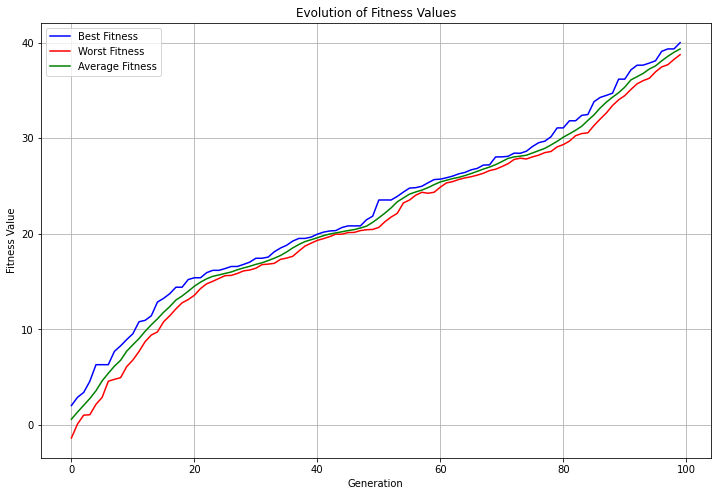

In [2]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Create fitness and individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Initialize DEAP toolbox
toolbox = base.Toolbox()

# Create attributes
toolbox.register("attr_float", random.uniform, -1, 1)

# Create individual and population
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define evaluation function
def evaluate(individual):
    return sum(individual),

# Register evaluation function
toolbox.register("evaluate", evaluate)

# Register crossover operator
toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Register mutation operator
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)

# Register selection operator
toolbox.register("select", tools.selTournament, tournsize=3)

# Create initial population
population = toolbox.population(n=50)

# Define the number of generations
num_generations = 100

# Initialize lists to store fitness values
best_fitness_values = []
worst_fitness_values = []
avg_fitness_values = []

# Execute the algorithm
for generation in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    
    fits = toolbox.map(toolbox.evaluate, offspring)
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))
    
    # Record and display fitness values
    best_ind = tools.selBest(population, k=1)[0]
    worst_ind = tools.selWorst(population, k=1)[0]
    avg_fitness = np.mean([ind.fitness.values[0] for ind in population])
    
    best_fitness_values.append(best_ind.fitness.values[0])
    worst_fitness_values.append(worst_ind.fitness.values[0])
    avg_fitness_values.append(avg_fitness)
    
    print(f"Generation {generation + 1} - Best Fitness: {best_ind.fitness.values[0]}, Worst Fitness: {worst_ind.fitness.values[0]}, Average Fitness: {avg_fitness}")

# Plot the evolution of fitness values
plt.figure(figsize=(12, 8))
plt.plot(best_fitness_values, label='Best Fitness', color='b')
plt.plot(worst_fitness_values, label='Worst Fitness', color='r')
plt.plot(avg_fitness_values, label='Average Fitness', color='g')
plt.title('Evolution of Fitness Values')
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.legend()
plt.grid(True)
plt.show()
